# Spam Filtering



In [1]:
#Perform necessary imports here

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
nltk.download('punkt')
nltk.download('wordnet')
import numpy as np
import re
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

[nltk_data] Downloading package punkt to /Users/its_av/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /Users/its_av/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#**Section 1: (5 points)** 

1. Download and load the dataset in pandas dataframe (1 point).

2. Display total number of rows and columns in dataset (1 point).

3. Show the first 5 entries of the dataframe (1 point).

4. Plot a bar graph showing number of spams and hams in dataset (2 points).

In [2]:
# Please insert your code here

df = pd.read_csv('ds.csv')


In [3]:
# Please insert your code here

rows = df.shape[0]
cols = df.shape[1]
print("Rows: " + str(rows))
print("Columns: " + str(cols))

Rows: 5708
Columns: 2


In [4]:
# Please insert your code here

df.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


1358 4350


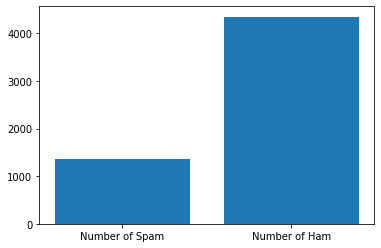

In [5]:
# Please insert your code here

spam=0
ham=0
for j in range(rows):
  if(df.loc[j][1]==1):
    spam+=1
  else:
    ham+=1
x_axis=["Number of Spam","Number of Ham"]
y_axis=[spam,ham]
plt.xlabel="Spam or Ham"
plt.ylabel="Count"
plt.bar(x_axis,y_axis)
print(spam,ham)


**Observations:**


It can easily be observed that the ham entries are greater in number in our dataset compared to spam entries.
>Number of spam entries = 1358
> & Number of ham entries = 4350

#**Section 2: Preprocessing (15 points)**



### Task 1 (10 points):
1. Remove all the punctuations from the text in dataset (2 point).

2. Remove all numericals from text (2 points).

3. Remove hyperlinks from text (2 points).

2. Convert all text in lower case (2 points).

5. Remove spaces from text (1 point).

6. Display any five rows of your dataframe on which above five operation are implemented (1 point).



In [ ]:
# Please insert your code here

def Punctuation(string):
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for x in string.lower():
        if x in punctuations:
            string = string.replace(x, "")
    return(string)
for j in range(rows):
  mystr=df.loc[j][0]
  df.loc[j,['text','spam']] = [Punctuation(mystr),df.loc[j][1]]

In [ ]:
# Please insert your code here

pattern = r'[0-9]'
for j in range(rows):
  mystr=df.loc[j][0]
  df.loc[j,['text','spam']] = [re.sub(pattern, '', mystr),df.loc[j][1]]

In [ ]:
# Please insert your code here

def remove_urls(vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)
for j in range(rows):
  mystr=df.loc[j][0]
  df.loc[j,['text','spam']] = [remove_urls(mystr),df.loc[j][1]]

In [ ]:
# Please insert your code here

for j in range(rows):
  mystr=df.loc[j][0]
  df.loc[j,['text','spam']] = [mystr.lower(),df.loc[j][1]]

In [ ]:
# Please insert your code here

for j in range(rows):
  mystr=df.loc[j][0]
  df.loc[j,['text','spam']] = [" ".join(mystr.split()),df.loc[j][1]]


In [ ]:
# Please insert your code here

df.head(5)

,text,spam
0,subject naturally irresistible your corporate ...,1
1,subject the stock trading gunslinger fanny is ...,1
2,subject unbelievable new homes made easy im wa...,1
3,subject color printing special request additio...,1
4,subject do not have money get software cds fro...,1



### Task 2 (Word Stemming and Word lemmatization) (5 points):



**Word Stemming:** is a process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma.

**Word lemmatization:** is a process of utilizing the dictionary of a particular language and trying to convert the words back to its base form.

These techniques try to reduce the words to its most basic form.

You have to convert the text using stemming and lemmatization  and display five random examples of the converted text.



Hint: Implementation of these algorithms is available in nltk library.

In [ ]:
# Please insert your code here

wordnet_lemmatizer = WordNetLemmatizer()
porter = PorterStemmer()
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)
def lemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(wordnet_lemmatizer.lemmatize(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)
#df['text'].apply(stemSentence)
#df['text'].apply(lemSentence)
for j in range(rows):
  mystr=df.loc[j][0]
  df.loc[j,['text','spam']] = [lemSentence(mystr),df.loc[j][1]]
  mystr=df.loc[j][0]
  df.loc[j,['text','spam']] = [stemSentence(mystr),df.loc[j][1]]
df.head(5)





,text,spam
0,subject natur irresist your corpor ident lt is...,1
1,subject the stock trade gunsling fanni is merr...,1
2,subject unbeliev new home made easi im want to...,1
3,subject color print special request addit info...,1
4,subject do not have money get softwar cd from ...,1


#**Section 3: Vectorization (5 points)**

1. Convert text to numerical vectors (such as TF.IDF). You may use available library function for the same.

In [ ]:
# Please insert your code here

vectorizer = TfidfVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(df['text'])
print(vectors.shape)

(5708, 25399)


#**Section 4: Splitting Data (5 points)**

You have to divide the given dataset two parts called train and test data, in the ratio 80:20 i.e. train data will contain 80% of total dataset and test will contain 20% dataset. The distribution of spam and ham email in train and test should be balanced.

You have to use Random state : 42

In [ ]:
# Please insert your code here

X_train, X_test, y_train, y_test = train_test_split(vectors, df['spam'], test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4566, 25399)
(1142, 25399)
(4566,)
(1142,)


#**Section 5: Vector-distance based Spam Filter (15 points)**


1. Implement the vector-distance based spam filter as discussed in the class (the method is described in the slides shared in the google classroom)

2. Report the accuracy, and f-measure. (Your can explore about accuracy and F-measure metrics here are some helpful links: 

Accuracy: https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification

F-measure: https://en.wikipedia.org/wiki/F-score


3. Plot the confusion matrix.
https://en.wikipedia.org/wiki/Confusion_matrix

4. Comment on the classifier's performance

Accuracy =  0.9816112084063048
F-Measure = 0.965
Confusion Matrix = 


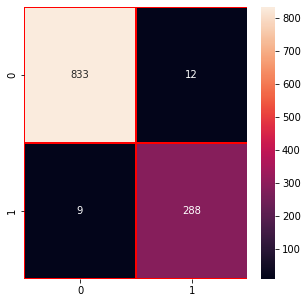

In [ ]:
# Please insert your code here
'''
tfidf_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
X_trains, X_tests, y_trains, y_tests = train_test_split(tfidf_df, df['spam'], test_size = 0.2, random_state = 42)
spam=[]
ham=[]
#size=len(X_train)
#print(X_train.loc[0])
#print(y_train.index[0])
#print(X_train.head(2))
#print(y_train.head(2))
#print(y_train)
#print(len(X_train))
#print(X_train[0])


for i in X_trains.index:
  if(y_trains[i]==0):
    #new_ham_df[i] = X_train.loc[i]
    ham.append(X_trains.loc[i])
  else:
    #new_spam_df[i] = X_train.loc[i]
    spam.append(X_trains.loc[i])

y_pred=[]
ls=len(spam)
lh=len(ham)
print(ls)
print(lh)
for i in X_tests.index:
  ssum=0
  hsum=0
  temp=X_tests.loc[i,:].values
  for j in range(ls):
    ssum=ssum+np.linalg.norm(temp-spam[j])
  for k in range(lh):
    hsum=hsum+np.linalg.norm(temp-ham[k])
  ssum=ssum/ls
  hsum=hsum/lh
  if(ssum<=hsum):
    y_pred.append(1)
  else:
    y_pred.append(0)
'''

my_graph_dump=[]
y=y_train.to_numpy()
spam_data=X_train[y==1]
ham_data=X_train[y==0]
#print(ham_data.shape)
spam_dist=cosine_similarity(X_test,spam_data)
ham_dist=cosine_similarity(X_test,ham_data)
avg_spam=np.mean(spam_dist,axis=1)
avg_ham=np.mean(ham_dist,axis=1)
y_pred=np.zeros(avg_ham.shape)
y_pred[avg_spam>avg_ham]=1
x=accuracy_score(y_test,y_pred)
zv=confusion_matrix(y_test, y_pred)
print("Accuracy = ",end=" ")
print(x)
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure = %.3f' % score)
print("Confusion Matrix = ")
#print(zv)
my_graph_dump.append({"Accuracy":x,"F-Score":score,"type":"Vector-Distance"})
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(zv,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.show()

#Comment

*   Used cosine similarity for calculating the distance between X_test and X_train vector as it was giving better performance compared to eucledian distance.
*   It has accuracy of .981.
*   It has F-Score of .965 and decision matrix shows that this classifier is making  overall 21 incorrect predictions out of 1142 testing data.





#**Section 6: Naiive Bayes (15 points)**


1. Apply Naive Bayes classifier to classify Spam/ham.

2. Report the accuracy, and f-measure.

3. Plot the confusion matrix.

4. Comment on the classifier's performance



Accuracy =  0.9772329246935202
F-Measure = 0.955
Confusion Matrix = 


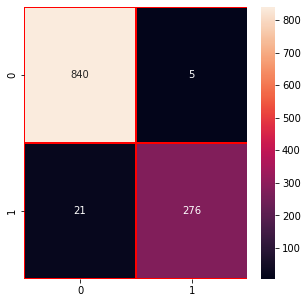

In [65]:
# Please insert your code here

mnb = MultinomialNB(alpha=0.2)
mnb.fit(X_train, y_train)
y_pred=mnb.predict(X_test)
#print(y_test)
#print(y_test)
x=accuracy_score(y_test,y_pred)
za=confusion_matrix(y_test, y_pred)
print("Accuracy = ",end=" ")
print(x)
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure = %.3f' % score)
print("Confusion Matrix = ")
#print(za)
my_graph_dump.append({"Accuracy":x,"F-Score":score,"type":"Naiive Bayes"})
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(za,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.show()

#Comment

*   Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems. It is mainly used in text classification that includes a high-dimensional training dataset.
*   Performance is slightly lesser than cosine similarity based vector distance classifier but better than Decision Tree classifier.
*   It has accuracy of .977.
*   It has F-Score of .955 and decision matrix shows that this classifier is making  overall 26 incorrect predictions out of 1142 testing data.





#**Section 7: Decision Tree (15 points)**
1. Apply Decision Tree Algorithm

2. Report the accuracy, and f-measure.

3. Plot the confusion matrix.

4. Comment on the classifier's performance

Accuracy =  0.9544658493870403
F-Measure = 0.912
Confusion Matrix = 


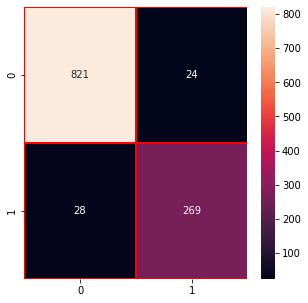

In [ ]:
# Please insert your code here

mnb = dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
mnb.fit(X_train, y_train)
y_pred=mnb.predict(X_test)
x=accuracy_score(y_test,y_pred)
zy=confusion_matrix(y_test, y_pred)
print("Accuracy = ",end=" ")
print(x)
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure = %.3f' % score)
print("Confusion Matrix = ")
#print(zy)
my_graph_dump.append({"Accuracy":x,"F-Score":score,"type":"Decision Tree"})
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(zy,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.show()

#Comment

*   Decision Trees are a type of Supervised Machine Learning where the data is continuously split according to a certain parameter. The tree can be explained by two entities, namely decision nodes and leaves. The leaves are the decisions or the final outcomes. And the decision nodes are where the data is split. 
*   Decision tree classifier has least performance compared to all other classifier's implemented here.
*   It has accuracy of .954.
*   It has F-Score of .912 and decision matrix shows that this classifier is making  overall 52 incorrect predictions out of 1142 testing data.





#**Section 8: Support Vector Machine (15 points)**

You have to use "linear" kernel.


1. Apply Support Vector Machine (SVM) algorithm

2. Report the accuracy, and f-measure.

3. Plot the confusion matrix.

4. Comment on the classifier's performance


Accuracy =  0.9912434325744308
F-Measure = 0.983
Confusion Matrix = 


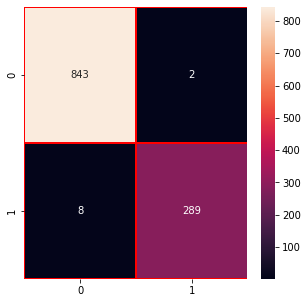

In [ ]:
# Please insert your code here

from sklearn import svm
svm = svm.SVC(kernel ='linear',C=1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
x=accuracy_score(y_test,y_pred)
zz=confusion_matrix(y_test, y_pred)
print("Accuracy = ",end=" ")
print(x)
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure = %.3f' % score)
print("Confusion Matrix = ")
#print(zz)
my_graph_dump.append({"Accuracy":x,"F-Score":score,"type":"SVM"})
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(zz,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.show()

#Comment


*   A support vector machine is a supervised learning algorithm that sorts data into two categories. It is trained with a series of data already classified into two categories, building the model as it is initially trained.
*   Support Vector Machine classifier has best performance compared to all other classifier's implemented here.
*   It has accuracy of .991.
*   It has F-Score of .983 and decision matrix shows that this classifier is making  only overall 10 incorrect predictions out of 1142 testing data.





#**Section 9: Compare all the classifiers' performances using graphs/plots and write your observations (10 points)**

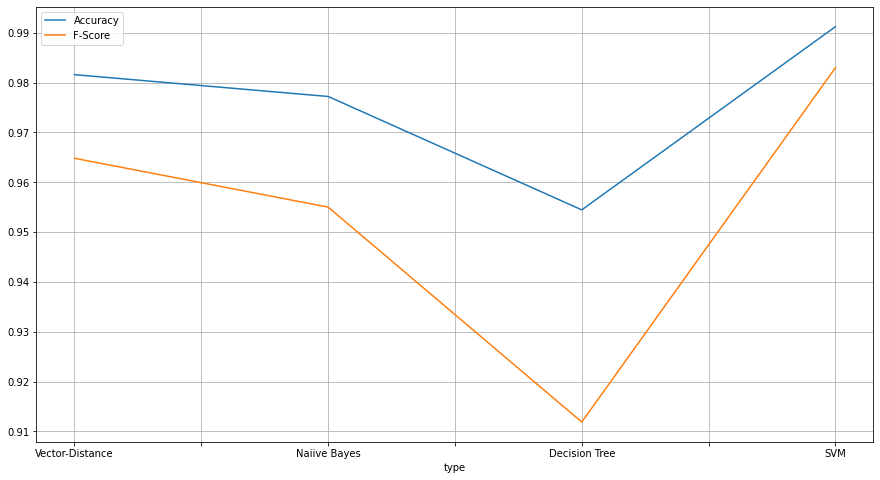

In [ ]:
#Insert code here

graph_df=pd.DataFrame().from_records(my_graph_dump)
graph_df.plot(x="type",figsize=(15,8),grid=True)


# Observations/Comments 

*   From above plot we can see that Support Vector Machine is giving best performance with accuracy of .991 and F-Score of .983 and one should always prefer it.
*   Decision tree classifier is giving least performance with accuracy of .954 and F-Score of .912 and should not be preferred.
*   Vector distance and Naiive Bayes shows almost similar performance with Vector distance slightly higher compared to Naiive Bayes.
*   One can prefer Naiive Bayes over Vector distance because of its simpler implementation and effectivity.
*   From confusion matrix we have observed that our dataset has more ham entries compared to spam entries, testing dataset has 845 ham entries and 297 spam entries.



